In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [364]:
df = pd.read_csv("../data/shrek_dialog_w_timestamps.csv", index_col="Unnamed: 0")

# Line count comparison

It's pretty straightforward to compare the number of lines spoken by each of the main characters.

In [365]:
df.groupby('name').count().max(1).sort_values(ascending=False)

name
DONKEY             346
SHREK              337
FIONA              188
MUSIC              142
FARQUAAD            99
GUARD               25
MIRROR              23
ROBIN HOOD          16
UNKNOWN             12
GINGERBREAD MAN      9
WOODEN PEOPLE        8
PRIEST               8
OLD WOMAN            8
MERRY MEN            6
MEN                  6
BLIND MOUSE          4
PINOCCHIO            3
CROWD                2
GUARDS               2
DWARF                1
CONGREGATION         1
MAN                  1
LITTLE BEAR          1
LITTLE PIG           1
WOMAN                1
PETER PAN            1
THEOLONIUS           1
BIG BAD WOLF         1
dtype: int64

## Act boundaries

We can define the act boundaries as such:

### Act 1 ---> Midpoint
Beginning ---> Shrek and Donkey head off to DuLoc (`00:15:53`)

### Act 2 ---> Midpoint

Shrek and Donkey head off to find Fiona ---> They rescue Fiona from the castle (`00:43:38`)

### Midpoint ---> Act 3

They rescue Fiona ---> Shrek returns to his swamp alone (`01:09:14`)

### Act 3 ---> End

Shrek returns to his swamp alone ---> End

In [382]:
act_2_start = 15*60+53
act_2_mid = 43*60+38
act_3_start = 1*3600+9*60+14

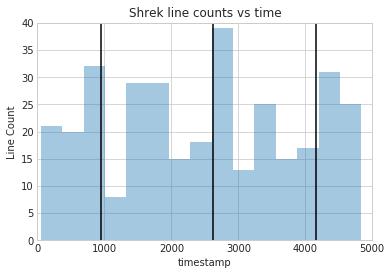

In [422]:
sns.distplot(df[df.name=='SHREK'].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 40)
plt.xlim(0, 5000);
plt.ylim(0, 40);
plt.ylabel('Line Count');
plt.title('Shrek line counts vs time');

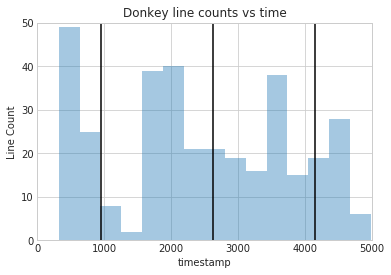

In [423]:
sns.distplot(df[df.name=='DONKEY'].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 50)
plt.xlim(0, 5000);
plt.ylim(0, 50);
plt.ylabel('Line Count');
plt.title('Donkey line counts vs time');

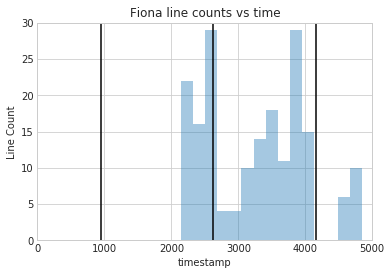

In [424]:
sns.distplot(df[df.name=='FIONA'].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 30)
plt.xlim(0, 5000);
plt.ylim(0, 30);
plt.ylabel('Line Count');
plt.title('Fiona line counts vs time');

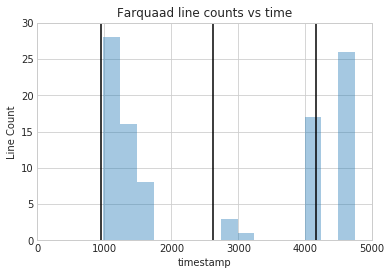

In [425]:
sns.distplot(df[df.name=='FARQUAAD'].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 30)
plt.xlim(0, 5000);
plt.ylim(0, 30);
plt.ylabel('Line Count');
plt.title('Farquaad line counts vs time');

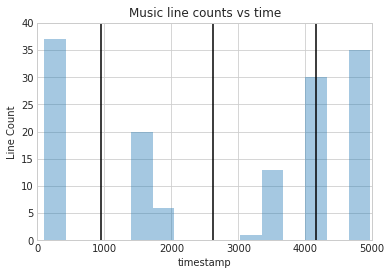

In [426]:
sns.distplot(df[df.name=='MUSIC'].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 40)
plt.xlim(0, 5000);
plt.ylim(0, 40);
plt.ylabel('Line Count');
plt.title('Music line counts vs time');

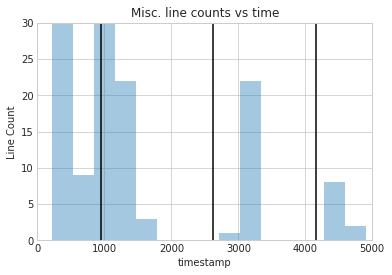

In [427]:
sns.distplot(df[~df.name.isin(['SHREK','DONKEY','FIONA','FARQUAAD','MUSIC'])].timestamp, kde=False, bins=15);
plt.vlines([act_2_start, act_2_mid, act_3_start], 0, 30)
plt.xlim(0, 5000);
plt.ylim(0, 30);
plt.ylabel('Line Count');
plt.title('Misc. line counts vs time');

## Word count

But for a better comparison (since the number of "lines" is determined by whoever put together the subtitle file) we can break the lines apart into a word count.

In [374]:
df['dialog_clean'] = df.dialog.str.replace(r'[,\'".?!]', '')
df['dialog_clean'] = df.dialog_clean.str.replace('-', ' ')

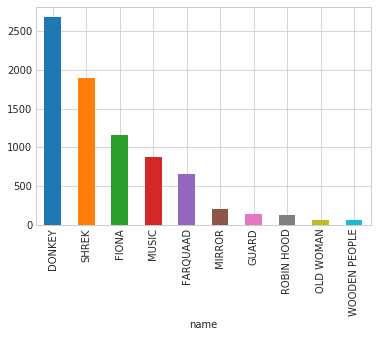

In [375]:
df['word_count'] = df.dialog_clean.str.split().apply(len)

df.groupby('name').word_count.sum().sort_values(ascending=False)[:10].plot(kind='bar');

## Longest words

In [376]:
df['char_count'] = df.dialog_clean.str.split().apply(
    lambda x: len(''.join(x)))
df['char_per_word'] = df.char_count/df.word_count

df.groupby('name').char_per_word.aggregate(
    [np.mean, np.std]).sort_values(
    by='mean', ascending=False).dropna()

,mean,std
name,,
MIRROR,4.654973,1.091799
MUSIC,4.099257,1.991978
FARQUAAD,4.093344,0.958236
WOODEN PEOPLE,3.992154,0.490429
DONKEY,3.927797,0.929519
GUARD,3.918667,0.724602
SHREK,3.894840,1.001144
ROBIN HOOD,3.844323,0.577824
FIONA,3.837463,0.729947


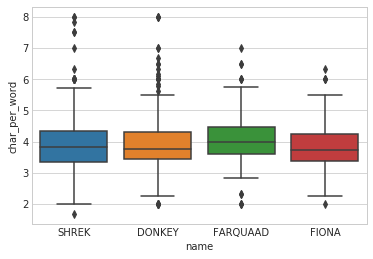

In [377]:
main_characters = ['SHREK', 'DONKEY', 'FIONA', 'FARQUAAD']

sns.boxplot(data=df[df.name.isin(main_characters)], x='name', y='char_per_word');

# Most common words

In [378]:
from collections import Counter

def get_sorted_word_counts(name):
    return sorted(Counter(' '.join(df[df.name==name].dialog_clean.str.lower()).split()).items(),
                  key=lambda x: x[1],
                  reverse=True)

def get_word_counts(name):
    return Counter(' '.join(df[df.name==name].dialog_clean.str.lower()).split())

In [379]:
word_counts = [(name, get_sorted_word_counts(name)[:10]) for name in main_characters]
word_counts

# Should remove common words with nltk/spacy or something and rerun

[('SHREK',
  [('you', 79),
   ('i', 61),
   ('the', 47),
   ('a', 41),
   ('no', 31),
   ('to', 29),
   ('what', 27),
   ('oh', 26),
   ('of', 25),
   ('im', 23)]),
 ('DONKEY',
  [('you', 141),
   ('i', 111),
   ('a', 71),
   ('the', 50),
   ('that', 45),
   ('shrek', 42),
   ('dont', 41),
   ('to', 41),
   ('me', 37),
   ('no', 34)]),
 ('FIONA',
  [('you', 47),
   ('i', 44),
   ('a', 35),
   ('to', 33),
   ('the', 22),
   ('this', 18),
   ('me', 18),
   ('and', 16),
   ('is', 16),
   ('true', 13)]),
 ('FARQUAAD',
  [('the', 38),
   ('you', 24),
   ('i', 16),
   ('to', 16),
   ('and', 13),
   ('have', 12),
   ('me', 11),
   ('a', 10),
   ('for', 10),
   ('on', 8)])]

# "You vs me" and "Us vs them"

Can we use extremely basic NLP techniques to judge how self-centered the characters of _Shrek_ are? Let's find out.

In [416]:
def me_you_ratio(name):
    wcs = get_word_counts(name)
    me_words = ['me', 'mine', 'my', 'i', 'ive', 'id', 'ill']
    you_words = ['you', 'youd', 'youll', 'your', 'youve', 'you\'re']
    me = sum([wcs[i] for i in me_words])
    you = sum([wcs[i] for i in you_words])
    if you != 0:
        return me/you
    else:
        return np.nan

def sort(fun, names=df.name.unique(), reverse=True):
    return sorted([(name, fun(name)) for name in names
        if not np.isnan(fun(name))], key=lambda x: x[1], reverse=reverse)

sort(me_you_ratio)

[('MUSIC', 4.2105263157894735),
 ('UNKNOWN', 2.0),
 ('OLD WOMAN', 2.0),
 ('ROBIN HOOD', 2.0),
 ('PRIEST', 2.0),
 ('GINGERBREAD MAN', 1.5),
 ('FIONA', 1.4067796610169492),
 ('FARQUAAD', 1.34375),
 ('SHREK', 1.1505376344086022),
 ('DONKEY', 1.1125),
 ('GUARD', 1.0),
 ('MIRROR', 0.4),
 ('MEN', 0.3333333333333333),
 ('BLIND MOUSE', 0.0),
 ('WOODEN PEOPLE', 0.0),
 ('MERRY MEN', 0.0)]

In [417]:
def us_them_ratio(name):
    wcs = get_word_counts(name)
    us_words = ['us', 'we', 'our', 'wed', 'well', 'lets']
    them_words = ['their', 'theyre', 'him', 'her', 'his',
                  'hers', 'theirs', 'hell', 'shell', 'hed', 'shed']
    us = sum([wcs[i] for i in us_words])
    them = sum([wcs[i] for i in them_words])
    if them != 0:
        return us/them
    else:
        return np.nan
    
    
sort(us_them_ratio)

[('FARQUAAD', 2.0),
 ('SHREK', 1.9473684210526316),
 ('FIONA', 1.8),
 ('DONKEY', 1.368421052631579),
 ('MEN', 1.0),
 ('DWARF', 1.0),
 ('GUARD', 0.75),
 ('MUSIC', 0.4444444444444444),
 ('MIRROR', 0.0),
 ('CROWD', 0.0),
 ('WOMAN', 0.0)]

# Vocabulary

Who knows the most words? Who repeats themselves the most?

In [418]:
def get_vocab_size(name):
    return np.unique(' '.join(df[df.name==name].dialog_clean.str.lower()).split()).shape[0]
    
sort(get_vocab_size)

[('DONKEY', 658),
 ('SHREK', 550),
 ('FIONA', 379),
 ('MUSIC', 295),
 ('FARQUAAD', 293),
 ('MIRROR', 136),
 ('GUARD', 91),
 ('ROBIN HOOD', 87),
 ('WOODEN PEOPLE', 41),
 ('OLD WOMAN', 39),
 ('UNKNOWN', 35),
 ('MEN', 33),
 ('GINGERBREAD MAN', 29),
 ('PRIEST', 29),
 ('BLIND MOUSE', 26),
 ('MERRY MEN', 24),
 ('PINOCCHIO', 14),
 ('DWARF', 10),
 ('LITTLE PIG', 8),
 ('CROWD', 7),
 ('PETER PAN', 6),
 ('LITTLE BEAR', 5),
 ('THEOLONIUS', 5),
 ('MAN', 4),
 ('WOMAN', 4),
 ('GUARDS', 2),
 ('BIG BAD WOLF', 1),
 ('CONGREGATION', 1)]

In [420]:
def pct_unique_words(name):
    return np.unique(' '.join(
        df[df.name==name].dialog_clean.str.lower()).split()).shape[0] / df[
        df.name==name].word_count.sum()
    
sort(pct_unique_words, names=main_characters)

[('FARQUAAD', 0.44596651445966512),
 ('FIONA', 0.32560137457044674),
 ('SHREK', 0.28947368421052633),
 ('DONKEY', 0.24561403508771928)]